# Handling Missing Data

## Numerical Data - Univariate Imputing
### Mean Median Imputation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [5]:
# missing data
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

The aim is to imputer 'Age' and 'Fare'

In [6]:
# separate input and output
x = df.drop(columns=['Survived'])
y = df['Survived']

#### Imputing using Pandas

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [8]:
x_train.shape, x_test.shape

((712, 3), (179, 3))

In [9]:
# missing values in test
x_train.isnull().mean()
# we note that age has around 20% missing and fare has around 5%

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [10]:
# calculate the mean and median
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_fare = x_train['Fare'].mean()
meadian_fare = x_train['Fare'].mean()

In [11]:
# create new columsn with the filled values
x_train['age_median'] = x_train['Age'].fillna(median_age)
x_train['age_mean'] = x_train['Age'].fillna(mean_age)

x_train['fare_median'] = x_train['Fare'].fillna(median_age)
x_train['fare_mean'] = x_train['Fare'].fillna(mean_age)

In [12]:
x_train.sample(5)

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
177,50.0,28.7125,0,50.00,50.000000,28.7125,28.7125
612,NaN,15.5000,1,28.75,29.785904,15.5000,15.5000
119,2.0,31.2750,6,2.00,2.000000,31.2750,31.2750
584,NaN,8.7125,0,28.75,29.785904,8.7125,8.7125
882,22.0,10.5167,0,22.00,22.000000,10.5167,10.5167


In [13]:
# check the variance of the columsn for change
print('Original Age Variance', x_train['Age'].var())
print('Age Mean Imputed Variance', x_train['age_mean'].var())
print('Age Median Imputed Variance', x_train['age_median'].var())

print('Original Fare Variance', x_train['Fare'].var())
print('Fare Mean Imputed Variance', x_train['fare_mean'].var())
print('Fare Median Imputed Variance', x_train['fare_median'].var())

# note that the variance cahnged a lot in 'Age' since it had more missing values
# comparatively 'fare' did not change much because it had less than 5% missing values

Original Age Variance 204.3495133904614
Age Mean Imputed Variance 161.81262452718673
Age Median Imputed Variance 161.9895663346054
Original Fare Variance 2448.197913706318
Fare Mean Imputed Variance 2324.623996772905
Fare Median Imputed Variance 2324.9576136149317


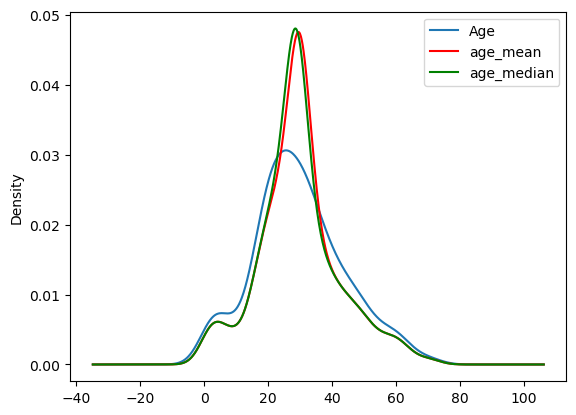

In [14]:
# plotting graphs for a better view
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# age imputed with mean
x_train['age_mean'].plot(kind='kde', ax=ax, color='red')

# age imputed with median
x_train['age_median'].plot(kind='kde', ax=ax, color='green')

# add the legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# notice the high change in the distribution

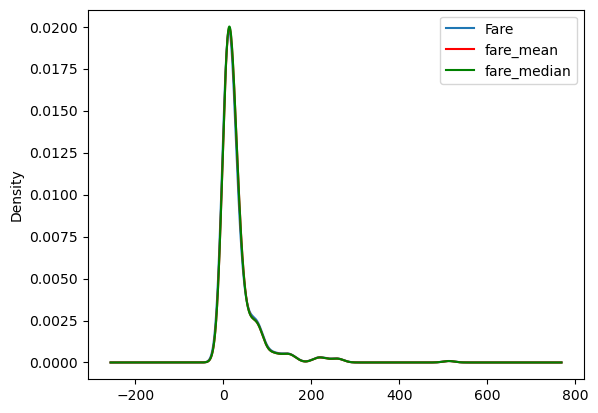

In [15]:
# for the 'fare' column
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# age imputed with mean
x_train['fare_mean'].plot(kind='kde', ax=ax, color='red')

# age imputed with median
x_train['fare_median'].plot(kind='kde', ax=ax, color='green')

# add the legend
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

# notice the lines all overlap

In [16]:
# checking covariance
x_train.cov()
# notice that the cov(Age, Family) and cov(age_meadin, Family) are different
# whereas cov(Fare, Family) and cov(fare_mean, Family) are nearer

,Age,Fare,Family,age_median,age_mean,fare_median,fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.280487,66.383530
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.404484,16.399278
age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,54.710043,54.793876
age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.483705,52.565299
fare_median,66.280487,2448.197914,16.404484,54.710043,52.483705,2324.957614,2324.765012
fare_mean,66.383530,2448.197914,16.399278,54.793876,52.565299,2324.765012,2324.623997


<Axes: >

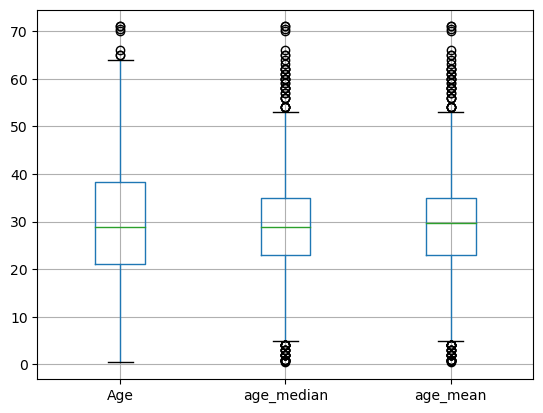

In [17]:
# outliers
x_train[['Age', 'age_median', 'age_mean']].boxplot()

<Axes: >

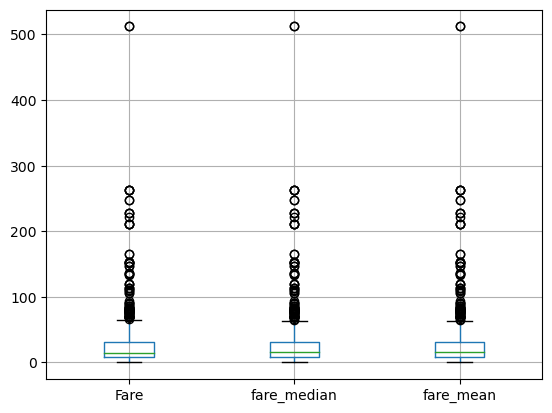

In [18]:
x_train[['Fare', 'fare_median', 'fare_mean']].boxplot()
# not much difference here..

#### Imputing using Sklearn

In [19]:
# train test split again
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [20]:
from sklearn.impute import SimpleImputer

# create objects
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [21]:
from sklearn.compose import ColumnTransformer
# now create column transformer object with simpleimputer objects
trf = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [22]:
# fit the dataset to this transformer
trf.fit(x_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [23]:
trf.named_transformers_['imputer1'].statistics_
# this is the meadian

array([28.75])

In [24]:
trf.named_transformers_['imputer2'].statistics_
# this is the mean

array([32.61759689])

In [25]:
# apply the transformation to the train and test dataset
x_train = trf.transform(x_train)
x_test = trf.transform(x_test)

In [26]:
x_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])